In [7]:
%pwd
%cd ../..

/home/rydevera3/data-science/umn_research/Deeplifting


In [8]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
# import polars as pl

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [9]:
# fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [10]:
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/{problem_name}_surface_and_contour-autumn.png'
# )

n_gpus: 2
cuda:0


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem 

/home/rydevera3/.pyenv/versions/3.9.16/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║  - │   -   ║  1.36801393836 ║   -  │   -  ║ QN │    28 │ 7.45e-09 ║     1 │ 3.201806   ║ 
   3 ║  - │   -   ║  1.24419581770 ║   -  │   -  ║ QN │    28 │ 7.45e-09 ║     1 │ 2.094919   ║ 
   4 ║  - │   -   ║  1.24388931103 ║   -  │   -  ║ QN │    11 │ 9.77e-04 ║     1 │ 5.45e-04   ║ 
   5 ║  - │   -   ║  1.12449427743 ║   -  │   -  ║ QN │    10 │ 1.003906 ║     1 │ 8.564098   ║ 
   6 ║  - │   -   ║  0.94440440533 ║   -  │   -  ║ QN │    30 │ 1.86e-09 ║     1 │ 5.463683   ║ 
   7 ║  - │   -   ║  0.55780890793 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 3.93e-05   ║ 
   8 ║  - │   -   ║  0.36990387179 ║   -  │   -  ║ QN │     3 │ 0.250000 ║     1 │ 2.06e-04   ║ 
   9 ║  - │   -   ║  0.25790898043 ║   -  │   -  ║ QN │     5 │ 0.062500 ║     1 │ 16.47580   ║ 
  10 ║  - │   -   ║  0.23427265222 ║   -  │   -  ║ QN │    21 │ 9.54e-07 ║     1 │ 1.133904   ║ 
  11 ║  - │   -   ║  0.21813301513 ║   -  │   -  ║ QN │    19 │ 3.81e-06 ║     1 │ 0.033800   ║ 
  12 ║  - │   -   ║  0.0761661

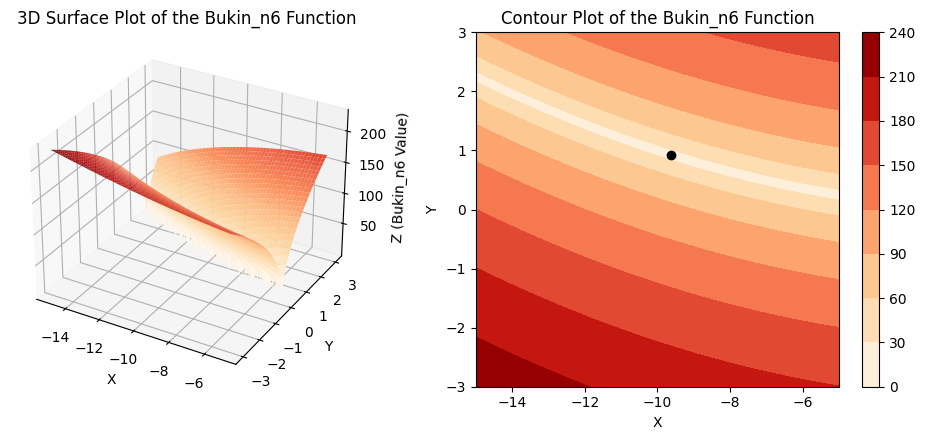

In [11]:
# Run all problems
problem_names = [
    # 'ackley',
    'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    # 'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    # 'schwefel',
    # 'shubert',
    # 'ex8_1_1',
    # # 'ex8_6_2',  # Need to fix threw an error
    # 'kriging_peaks_red010',
    # 'kriging_peaks_red020',
    # 'kriging_peaks_red030',
    # 'kriging_peaks_red050',
    # 'kriging_peaks_red100',
    # 'kriging_peaks_red200',
    # 'kriging_peaks_red500',
    # 'mathopt6',
    # 'quantum',
    # 'rosenbrock',
    # 'cross_leg_table',
    # 'sine_envelope',
]

problem_performance = []
trials = 1

for problem_name in problem_names:
    problem = PROBLEMS_BY_NAME[problem_name]
    outputs = run_deeplifting(
        problem,
        trials=trials,
        input_size=1024,
        hidden_sizes=(768, 768, 768),
        activation='sine',
        output_activation='sine',
        agg_function='max',
    )
    results = outputs['final_results']

    # # get the global minimum and the number of hits
    # minimum_value = problem['global_minimum']
    # hit = np.array([np.abs(found_min - minimum_value) for _, _, found_min in results])
    # hits = np.where(hit <= 1e-4, 1, 0).mean()

    # # Create a performance dataframe
    # df = pl.DataFrame(
    #     {
    #         'problem_name': [problem_name] * trials,
    #         'algorithm': ['deeplifting'] * trials,
    #         'hits': hits,
    #     }
    # )
    # problem_performance.append(df)

    # Let's plot the values with UMN colors
    fig = create_optimization_plot(
        problem_name, problem, results, add_contour_plot=True, colormap='OrRd'
    )

In [12]:
results

[(-9.619752496991271,
  0.9253958697397389,
  0.07530729718713872,
  'Deeplifting',
  111.46365785598755)]

In [ ]:
# fig.subplots_adjust(left=0, right=2, bottom=0, top=2)
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/ackley_introduction.png',
#     bbox_inches='tight',
#     pad_inches=-0.1,
# )

In [ ]:
# performance_df = pl.concat(problem_performance, how='vertical')

In [ ]:
# performance_df = (
#     performance_df.groupby(['problem_name'])
#     .agg(pl.col('hits').mean())
#     .rename({'hits': 'success_rate'})
#     .sort('problem_name')
# )

In [ ]:
# performance_df

In [ ]:
# problem_name = 'bukin_n6'
# problem = PROBLEMS_BY_NAME[problem_name]
# problem['bounds'] = [(-10.0001, -9.9999), (1.0001, 0.9999)]
# results = np.array([[-10, 1, 0, 0, 0]])

# create_optimization_plot(
#     problem_name, problem, results, add_contour_plot=True, colormap='OrRd_r'
# )

In [ ]:
[64] * 2

In [6]:
from itertools import product

input_sizes = [32, 64, 128, 256, 512, 1024, 2046]

hidden_size_64 = (64,)
hidden_size_128 = (128,)
hidden_size_256 = (256,)
hidden_size_512 = (512,)
hidden_size_768 = (768,)
hidden_size_1024 = (1024,)
hidden_size_2048 = (2048,)

hidden_sizes = [
    # Hidden sizes of 64
    hidden_size_64 * 2,
    hidden_size_64 * 3,
    hidden_size_64 * 4,
    hidden_size_64 * 5,

    # Hidden sizes of 128
    hidden_size_128 * 2,
    hidden_size_128 * 3,
    hidden_size_128 * 4,
    hidden_size_128 * 5,

    # Hidden sizes of 256
    hidden_size_256 * 2,
    hidden_size_256 * 3,
    hidden_size_256 * 4,
    hidden_size_256 * 5,

    # Hidden sizes of 512
    hidden_size_512 * 2,
    hidden_size_512 * 3,
    hidden_size_512 * 4,
    hidden_size_512 * 5,

    # Hidden sizes of 768
    hidden_size_768 * 2,
    hidden_size_768 * 3,
    hidden_size_768 * 4,
    hidden_size_768 * 5,

    # Hidden sizes of 1024
    hidden_size_1024 * 2,
    hidden_size_1024 * 3,
    hidden_size_1024 * 4,
    hidden_size_1024 * 5,

    # Hidden sizes of 2048
    hidden_size_2048 * 2,
    hidden_size_2048 * 3,
    hidden_size_2048 * 4,    
]

hidden_activations = ['sine', 'relu', 'leaky_relu']
output_activations = ['sine', 'leaky_relu']
agg_functions = ['max', 'sum', 'average']

combinations = (input_sizes, hidden_sizes, hidden_activations, output_activations, agg_functions)

list(product(*combinations))

[(32, (64, 64), 'sine', 'sine', 'max'),
 (32, (64, 64), 'sine', 'sine', 'sum'),
 (32, (64, 64), 'sine', 'sine', 'average'),
 (32, (64, 64), 'sine', 'leaky_relu', 'max'),
 (32, (64, 64), 'sine', 'leaky_relu', 'sum'),
 (32, (64, 64), 'sine', 'leaky_relu', 'average'),
 (32, (64, 64), 'relu', 'sine', 'max'),
 (32, (64, 64), 'relu', 'sine', 'sum'),
 (32, (64, 64), 'relu', 'sine', 'average'),
 (32, (64, 64), 'relu', 'leaky_relu', 'max'),
 (32, (64, 64), 'relu', 'leaky_relu', 'sum'),
 (32, (64, 64), 'relu', 'leaky_relu', 'average'),
 (32, (64, 64), 'leaky_relu', 'sine', 'max'),
 (32, (64, 64), 'leaky_relu', 'sine', 'sum'),
 (32, (64, 64), 'leaky_relu', 'sine', 'average'),
 (32, (64, 64), 'leaky_relu', 'leaky_relu', 'max'),
 (32, (64, 64), 'leaky_relu', 'leaky_relu', 'sum'),
 (32, (64, 64), 'leaky_relu', 'leaky_relu', 'average'),
 (32, (64, 64, 64), 'sine', 'sine', 'max'),
 (32, (64, 64, 64), 'sine', 'sine', 'sum'),
 (32, (64, 64, 64), 'sine', 'sine', 'average'),
 (32, (64, 64, 64), 'sine', 'l